In [37]:
# For Data Processing
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image, ImageEnhance

# For ML Models
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.losses import *
from tensorflow.keras.models import *
from tensorflow.keras.metrics import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.applications import *
from tensorflow.keras.preprocessing.image import load_img

# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Miscellaneous
from tqdm import tqdm
import os
import random

In [38]:
train_dir ='C:/Users/ANANNYA/Desktop/Data/Training'
test_dir = 'C:/Users/ANANNYA/Desktop/Data/Testing'

train_paths = []
train_labels = []

for label in os.listdir(train_dir):
    for image in os.listdir(train_dir+"//" +label):
        train_paths.append(train_dir + '//'+label+ '//'+image)
        train_labels.append(label)

train_paths, train_labels = shuffle(train_paths, train_labels)

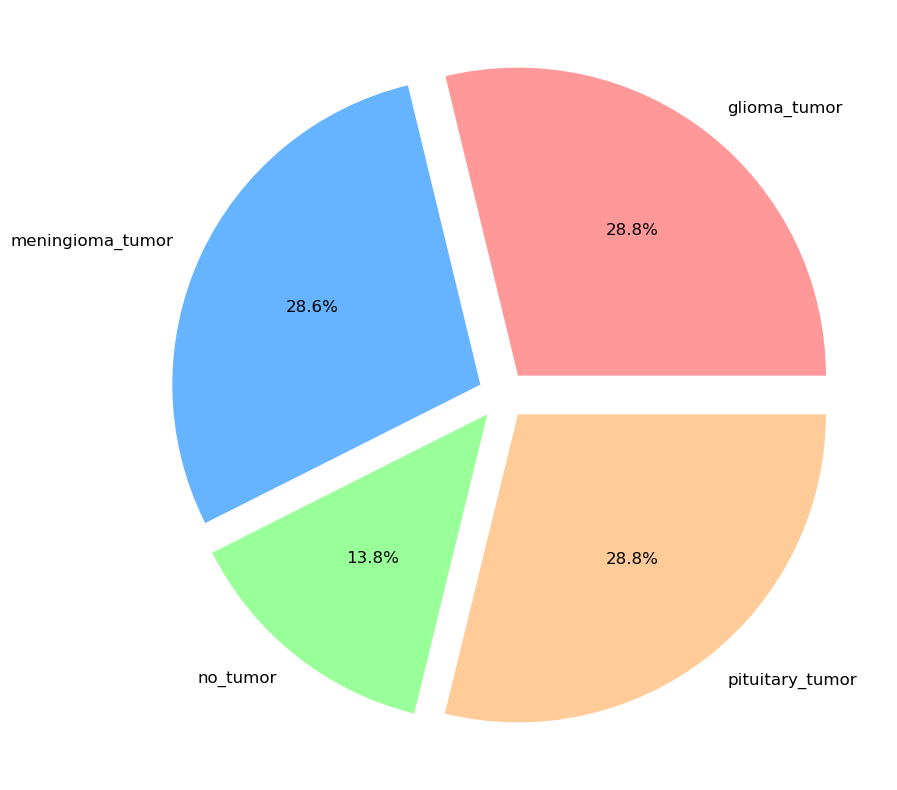

C:\Users\ANANNYA\f1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


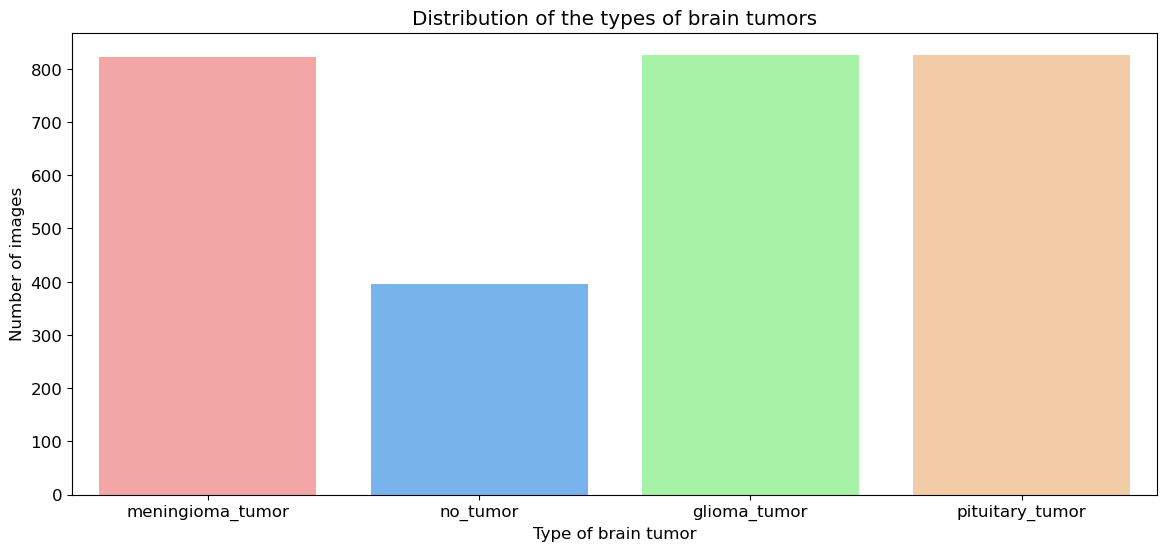

In [39]:
plt.figure(figsize=(10,10))
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
plt.pie([len(os.listdir(train_dir+"//" +label)) 
        for label in os.listdir(train_dir)],
         labels=os.listdir(train_dir),
          colors = colors,
           explode = (0.08,0.08,0.08,0.08) 
           ,autopct='%1.1f%%')
plt.show()




plt.figure(figsize=(14,6))
sns.countplot(train_labels, palette=colors)
plt.title('Distribution of the types of brain tumors')
plt.xlabel('Type of brain tumor')
plt.ylabel('Number of images');

In [40]:
test_paths = []
test_labels = []

for label in os.listdir(test_dir):
    for image in os.listdir(test_dir+ '//' + label):
        test_paths.append(test_dir +'//'+label + '//'+image)
        test_labels.append(label)

test_paths, test_labels = shuffle(test_paths, test_labels)

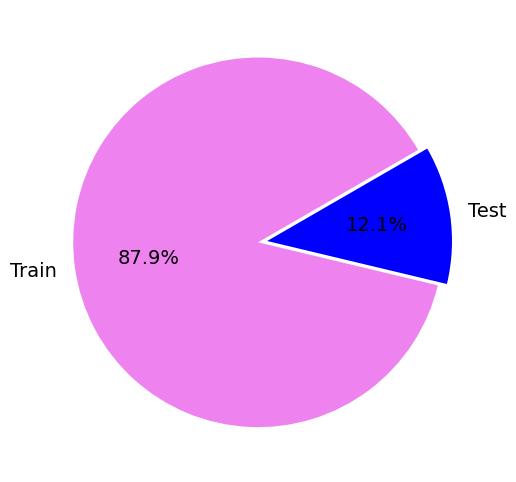

In [41]:
plt.figure(figsize=(14,6))
colors = ['Violet' , 'Blue']
plt.rcParams.update({'font.size': 14})
plt.pie([len(train_labels), len(test_labels)],
        labels=['Train','Test'],
        colors=colors, autopct='%.1f%%', explode=(0.05,0),
        startangle=30);

In [42]:
def augment_image(image):
    image = Image.fromarray(np.uint8(image))
    image = ImageEnhance.Brightness(image).enhance(random.uniform(0.8,1.2))
    image = ImageEnhance.Contrast(image).enhance(random.uniform(0.8,1.2))
    image = ImageEnhance.Sharpness(image).enhance(random.uniform(0.8,1.2))
    image = np.array(image)/255.0
    return image

In [43]:
#Example for the data:

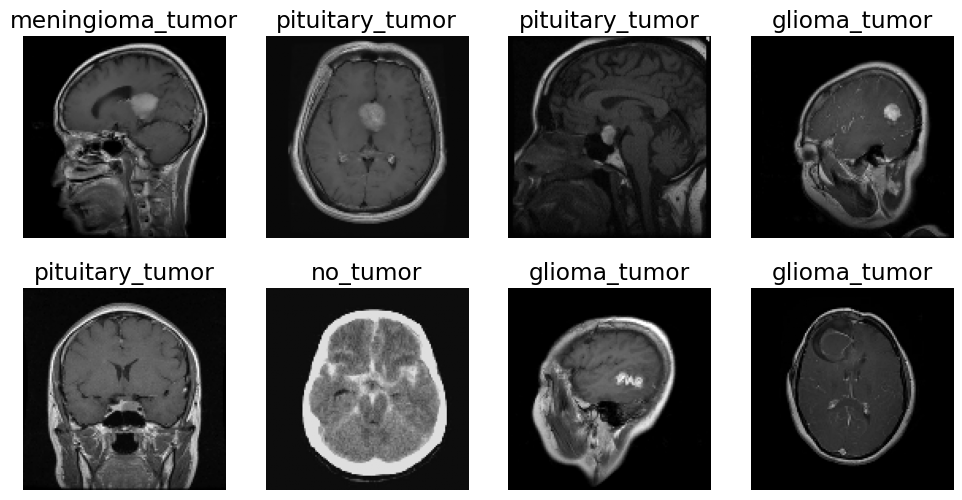

In [44]:
IMAGE_SIZE = 128


def open_images(paths):

    images = []
    for path in paths:
        image = load_img(path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
        image = augment_image(image)
        images.append(image)
    return np.array(images)


images = open_images(train_paths[50:59])
labels = train_labels[50:59]
fig = plt.figure(figsize=(12, 6))
for x in range(1, 9):
    fig.add_subplot(2, 4, x)
    plt.axis('off')
    plt.title(labels[x])
    plt.imshow(images[x])
plt.rcParams.update({'font.size': 12})
plt.show()

In [45]:
#Data Generator

In [46]:
unique_labels = os.listdir(train_dir)

def encode_label(labels):
    encoded = []
    for x in labels:
        encoded.append(unique_labels.index(x))
    return np.array(encoded)

def decode_label(labels):
    decoded = []
    for x in labels:
        decoded.append(unique_labels[x])
    return np.array(decoded)

def datagen(paths, labels, batch_size=12, epochs=1):
    for _ in range(epochs):
        for x in range(0, len(paths), batch_size):
            batch_paths = paths[x:x+batch_size]
            batch_images = open_images(batch_paths)
            batch_labels = labels[x:x+batch_size]
            batch_labels = encode_label(batch_labels)
            yield batch_images, batch_labels

In [47]:
#CNN Model

In [48]:
def build_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(Flatten())
    model.add(Dense(16, activation='relu'))
    model.add(Dense(4, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

model = build_model()
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_97 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_98 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_99 (Conv2D)          (None, 28, 28, 32)        18464     
                                                                 
 flatten_3 (Flatten)         (None, 25088)            

In [49]:
keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [50]:
#Train CNN Model

In [51]:
model.fit(datagen(train_paths, train_labels, batch_size=32, epochs=10), steps_per_epoch=len(train_paths)//32, epochs=10)

Epoch 1/10
89/89 [==============================] - 26s 283ms/step - loss: 1.0366 - accuracy: 0.5449
Epoch 2/10
89/89 [==============================] - 24s 275ms/step - loss: 0.6597 - accuracy: 0.7283
Epoch 3/10
89/89 [==============================] - 26s 297ms/step - loss: 0.5036 - accuracy: 0.7918
Epoch 4/10
89/89 [==============================] - 25s 284ms/step - loss: 0.4108 - accuracy: 0.8407
Epoch 5/10
89/89 [==============================] - 26s 287ms/step - loss: 0.3549 - accuracy: 0.8584
Epoch 6/10
89/89 [==============================] - 26s 287ms/step - loss: 0.2483 - accuracy: 0.9101
Epoch 7/10
89/89 [==============================] - 25s 285ms/step - loss: 0.1941 - accuracy: 0.9264
Epoch 8/10
89/89 [==============================] - 25s 285ms/step - loss: 0.1574 - accuracy: 0.9450
Epoch 9/10
89/89 [==============================] - 25s 286ms/step - loss: 0.1243 - accuracy: 0.9553
Epoch 10/10
89/89 [==============================] - 25s 285ms/step - loss: 0.1194 - accura

In [52]:
#Evaluate the model

In [53]:
train_loss, train_acc = model.evaluate(open_images(train_paths), encode_label(train_labels))
test_loss, test_acc = model.evaluate(open_images(test_paths), encode_label(test_labels))

print('Train accuracy:', train_acc)
print('Test accuracy:', test_acc)

13/13 [==============================] - 1s 54ms/step - loss: 2.6054 - accuracy: 0.7563
Train accuracy: 0.9536585211753845
Test accuracy: 0.7563451528549194


In [54]:
#VGG Model

In [55]:
base_model = VGG16(input_shape=(IMAGE_SIZE,IMAGE_SIZE,3), include_top=False, weights='imagenet')
# Set all layers to non-trainable
for layer in base_model.layers:
    layer.trainable = False
# Set the last vgg block to trainable
base_model.layers[-2].trainable = True
base_model.layers[-3].trainable = True
base_model.layers[-4].trainable = True

model = Sequential()
model.add(Input(shape=(IMAGE_SIZE,IMAGE_SIZE,3)))
model.add(base_model)
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(len(unique_labels), activation='softmax'))

In [56]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_4 (Flatten)         (None, 8192)              0         
                                                                 
 dropout_5 (Dropout)         (None, 8192)              0         
                                                                 
 dense_9 (Dense)             (None, 128)               1048704   
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 4)                 516       
                                                                 
Total params: 15,763,908
Trainable params: 8,128,644
N

In [57]:
keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [58]:
model.compile(optimizer=Adam(learning_rate=0.0001),
             loss='sparse_categorical_crossentropy',
             metrics=['sparse_categorical_accuracy'])

In [59]:
#Train VGG Model

In [60]:
batch_size = 20
steps = int(len(train_paths)/batch_size)
epochs = 10
history = model.fit(datagen(train_paths, train_labels, batch_size=batch_size, epochs=epochs),
                    epochs=epochs, steps_per_epoch=steps)

Epoch 1/10
143/143 [==============================] - 232s 2s/step - loss: 0.6782 - sparse_categorical_accuracy: 0.7224
Epoch 2/10
143/143 [==============================] - 232s 2s/step - loss: 0.3611 - sparse_categorical_accuracy: 0.8642
Epoch 3/10
143/143 [==============================] - 220s 2s/step - loss: 0.2600 - sparse_categorical_accuracy: 0.8975
Epoch 4/10
143/143 [==============================] - 223s 2s/step - loss: 0.1760 - sparse_categorical_accuracy: 0.9337
Epoch 5/10
143/143 [==============================] - 203s 1s/step - loss: 0.1233 - sparse_categorical_accuracy: 0.9533
Epoch 6/10
143/143 [==============================] - 213s 1s/step - loss: 0.1264 - sparse_categorical_accuracy: 0.9533
Epoch 7/10
143/143 [==============================] - 214s 1s/step - loss: 0.1146 - sparse_categorical_accuracy: 0.9551
Epoch 8/10
143/143 [==============================] - 228s 2s/step - loss: 0.0923 - sparse_categorical_accuracy: 0.9663
Epoch 9/10
143/143 [====================

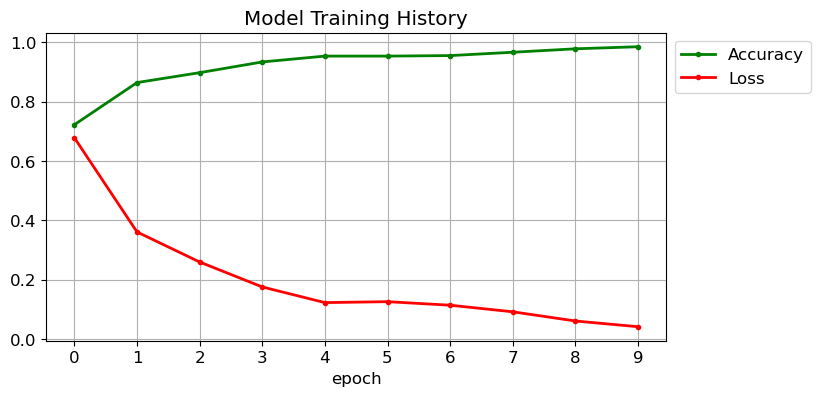

In [61]:
plt.figure(figsize=(8,4))
plt.grid(True)
plt.plot(history.history['sparse_categorical_accuracy'], '.g-', linewidth=2)
plt.plot(history.history['loss'], '.r-', linewidth=2)
plt.title('Model Training History')
plt.xlabel('epoch')
plt.xticks([x for x in range(epochs)])
plt.legend(['Accuracy', 'Loss'], loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [62]:
#Evaluate Model with Test Samples

In [63]:
batch_size = 32
steps = int(len(test_paths)/batch_size)
y_pred = []
y_true = []
for x,y in tqdm(datagen(test_paths, test_labels, batch_size=batch_size, epochs=1), total=steps):
    pred = model.predict(x)
    pred = np.argmax(pred, axis=-1)
    for i in decode_label(pred):
        y_pred.append(i)
    for i in decode_label(y):
        y_true.append(i)

  0%|                                                                                           | 0/12 [00:00<?, ?it/s]

1/1 [==============================] - 2s 2s/step


  8%|██████▉                                                                            | 1/12 [00:02<00:24,  2.21s/it]

1/1 [==============================] - 2s 2s/step


 17%|█████████████▊                                                                     | 2/12 [00:04<00:21,  2.11s/it]

1/1 [==============================] - 2s 2s/step


 25%|████████████████████▊                                                              | 3/12 [00:06<00:18,  2.07s/it]

1/1 [==============================] - 2s 2s/step


 33%|███████████████████████████▋                                                       | 4/12 [00:08<00:16,  2.05s/it]

1/1 [==============================] - 2s 2s/step


 42%|██████████████████████████████████▌                                                | 5/12 [00:10<00:14,  2.05s/it]

1/1 [==============================] - 2s 2s/step


 50%|█████████████████████████████████████████▌                                         | 6/12 [00:12<00:12,  2.04s/it]

1/1 [==============================] - 2s 2s/step


 58%|████████████████████████████████████████████████▍                                  | 7/12 [00:14<00:10,  2.03s/it]

1/1 [==============================] - 2s 2s/step


 67%|███████████████████████████████████████████████████████▎                           | 8/12 [00:16<00:08,  2.03s/it]

1/1 [==============================] - 2s 2s/step


 75%|██████████████████████████████████████████████████████████████▎                    | 9/12 [00:18<00:06,  2.04s/it]

1/1 [==============================] - 2s 2s/step


 83%|████████████████████████████████████████████████████████████████████▎             | 10/12 [00:20<00:04,  2.04s/it]

1/1 [==============================] - 2s 2s/step


 92%|███████████████████████████████████████████████████████████████████████████▏      | 11/12 [00:22<00:02,  2.03s/it]

1/1 [==============================] - 2s 2s/step


100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:24<00:00,  2.07s/it]

1/1 [==============================] - 1s 795ms/step


13it [00:25,  1.96s/it]                                                                                                


In [64]:
print(classification_report(y_true, y_pred))

                  precision    recall  f1-score   support

    glioma_tumor       0.88      0.22      0.35       100
meningioma_tumor       0.75      0.97      0.85       115
        no_tumor       0.72      1.00      0.84       105
 pituitary_tumor       0.89      0.88      0.88        74

        accuracy                           0.77       394
       macro avg       0.81      0.77      0.73       394
    weighted avg       0.80      0.77      0.73       394



In [65]:
#Train Inception Model

In [66]:
# build inception model
base_model = InceptionV3(input_shape=(IMAGE_SIZE,IMAGE_SIZE,3), include_top=False, weights='imagenet')
# Set all layers to non-trainable
for layer in base_model.layers:
    layer.trainable = False
# Set the last vgg block to trainable
base_model.layers[-2].trainable = True
base_model.layers[-3].trainable = True
base_model.layers[-4].trainable = True
base_model.layers[-5].trainable = True

model = Sequential()
model.add(Input(shape=(IMAGE_SIZE,IMAGE_SIZE,3)))
model.add(base_model)
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(len(unique_labels), activation='softmax'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 2, 2, 2048)        21802784  
                                                                 
 flatten_5 (Flatten)         (None, 8192)              0         
                                                                 
 dropout_7 (Dropout)         (None, 8192)              0         
                                                                 
 dense_11 (Dense)            (None, 128)               1048704   
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 dense_12 (Dense)            (None, 256)               33024     
                                                                 
 dropout_9 (Dropout)         (None, 256)              

In [67]:
keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [68]:
model.compile(optimizer=Adam(learning_rate=0.0001),
                loss='sparse_categorical_crossentropy',
                metrics=['sparse_categorical_accuracy'])

batch_size = 20
steps = int(len(train_paths)/batch_size)
epochs = 10
history = model.fit(datagen(train_paths, train_labels, batch_size=batch_size, epochs=epochs),
                    epochs=epochs, steps_per_epoch=steps)

Epoch 1/10
143/143 [==============================] - 45s 267ms/step - loss: 1.1948 - sparse_categorical_accuracy: 0.5189
Epoch 2/10
143/143 [==============================] - 37s 260ms/step - loss: 0.8410 - sparse_categorical_accuracy: 0.6558
Epoch 3/10
143/143 [==============================] - 37s 256ms/step - loss: 0.6975 - sparse_categorical_accuracy: 0.7186
Epoch 4/10
143/143 [==============================] - 37s 256ms/step - loss: 0.6063 - sparse_categorical_accuracy: 0.7551
Epoch 5/10
143/143 [==============================] - 37s 256ms/step - loss: 0.5359 - sparse_categorical_accuracy: 0.7958
Epoch 6/10
143/143 [==============================] - 40s 278ms/step - loss: 0.4403 - sparse_categorical_accuracy: 0.8284
Epoch 8/10
143/143 [==============================] - 38s 263ms/step - loss: 0.4080 - sparse_categorical_accuracy: 0.8386
Epoch 9/10
143/143 [==============================] - 39s 273ms/step - loss: 0.3920 - sparse_categorical_accuracy: 0.8467
Epoch 10/10
143/143 [===

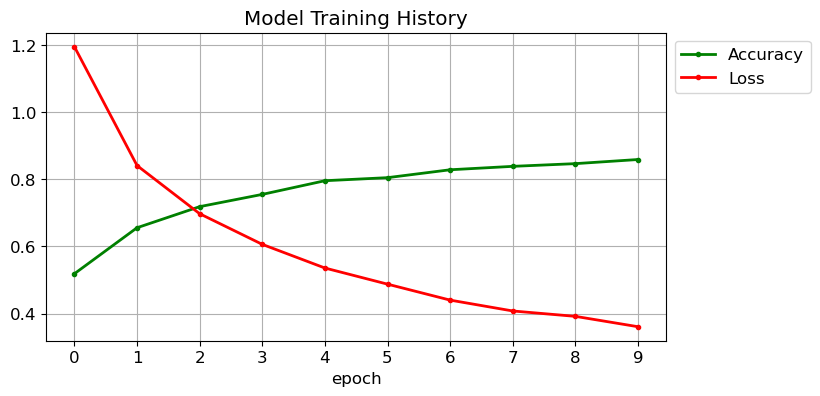

In [69]:
plt.figure(figsize=(8,4))
plt.grid(True)
plt.plot(history.history['sparse_categorical_accuracy'], '.g-', linewidth=2)
plt.plot(history.history['loss'], '.r-', linewidth=2)
plt.title('Model Training History')
plt.xlabel('epoch')
plt.xticks([x for x in range(epochs)])
plt.legend(['Accuracy', 'Loss'], loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [70]:
# Evaluate Model with Test Samples

In [71]:
# Evaluate model with test data
batch_size = 32
steps = int(len(test_paths)/batch_size)
y_pred = []
y_true = []
for x,y in tqdm(datagen(test_paths, test_labels, batch_size=batch_size, epochs=1), total=steps):
    pred = model.predict(x)
    pred = np.argmax(pred, axis=-1)
    for i in decode_label(pred):
        y_pred.append(i)
    for i in decode_label(y):
        y_true.append(i)

  0%|                                                                                           | 0/12 [00:00<?, ?it/s]

1/1 [==============================] - 3s 3s/step


  8%|██████▉                                                                            | 1/12 [00:02<00:30,  2.80s/it]

1/1 [==============================] - 0s 358ms/step


 17%|█████████████▊                                                                     | 2/12 [00:03<00:14,  1.46s/it]

1/1 [==============================] - 0s 352ms/step


 25%|████████████████████▊                                                              | 3/12 [00:03<00:09,  1.02s/it]

1/1 [==============================] - 0s 351ms/step


 33%|███████████████████████████▋                                                       | 4/12 [00:04<00:06,  1.23it/s]

1/1 [==============================] - 0s 352ms/step


 42%|██████████████████████████████████▌                                                | 5/12 [00:04<00:04,  1.43it/s]

1/1 [==============================] - 0s 352ms/step


 50%|█████████████████████████████████████████▌                                         | 6/12 [00:05<00:03,  1.60it/s]

1/1 [==============================] - 0s 355ms/step


 58%|████████████████████████████████████████████████▍                                  | 7/12 [00:05<00:02,  1.72it/s]

1/1 [==============================] - 0s 357ms/step


 67%|███████████████████████████████████████████████████████▎                           | 8/12 [00:06<00:02,  1.79it/s]

1/1 [==============================] - 0s 355ms/step


 75%|██████████████████████████████████████████████████████████████▎                    | 9/12 [00:06<00:01,  1.82it/s]

1/1 [==============================] - 0s 357ms/step


 83%|████████████████████████████████████████████████████████████████████▎             | 10/12 [00:07<00:01,  1.85it/s]

1/1 [==============================] - 0s 355ms/step


 92%|███████████████████████████████████████████████████████████████████████████▏      | 11/12 [00:07<00:00,  1.90it/s]

1/1 [==============================] - 0s 355ms/step


100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:08<00:00,  1.88it/s]

1/1 [==============================] - 2s 2s/step


13it [00:10,  1.24it/s]                                                                                                


In [72]:
print(classification_report(y_true, y_pred))

                  precision    recall  f1-score   support

    glioma_tumor       0.88      0.28      0.42       100
meningioma_tumor       0.65      0.90      0.75       115
        no_tumor       0.65      0.89      0.75       105
 pituitary_tumor       0.93      0.73      0.82        74

        accuracy                           0.71       394
       macro avg       0.78      0.70      0.69       394
    weighted avg       0.76      0.71      0.68       394

